In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error
import matplotlib.pylab as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

import tensorflow as tf
from keras._tf_keras.keras.models import Model
from keras._tf_keras.keras.layers import Dense, Input, Dropout
from keras._tf_keras.keras.regularizers import l2

np.random.seed(123)
tf.random.set_seed(123)

In [4]:
df0 = pd.read_csv('ETH-USD.csv', index_col=0, parse_dates=True)

In [5]:
df = df0[['Close']].copy()

In [17]:
df['LogClose'] = np.log(df['Close'])
df['DiffLogClose'] = df['LogClose'].diff()

In [18]:
df1 = df[:500].copy()
df2 = df[:1000].copy()
df3 = df[:1500].copy()
df4 = df.copy()

In [19]:
df3

,Close,LogClose,DiffLogClose
Date,,,
2019-08-25,186.842392,5.230265,NaN
2019-08-26,188.929382,5.241373,0.011108
2019-08-27,187.516663,5.233868,-0.007506
2019-08-28,173.889969,5.158423,-0.075445
2019-08-29,169.516739,5.132952,-0.025471
...,...,...,...
2023-09-28,1652.882690,7.410276,0.034086
2023-09-29,1667.943848,7.419347,0.009071
2023-09-30,1671.161865,7.421274,0.001927


In [20]:
Ntest = 30
train1 = df1.iloc[:-Ntest]
test1 = df1.iloc[-Ntest:]
train2 = df2.iloc[:-Ntest]
test2 = df2.iloc[-Ntest:]
train3 = df3.iloc[:-Ntest]
test3 = df3.iloc[-Ntest:]
train4 = df4.iloc[:-Ntest]
test4 = df4.iloc[-Ntest:]

In [21]:
scaler = StandardScaler()
train_scaled1 = scaler.fit_transform(train1[['DiffLogClose']])
test_scaled1 = scaler.fit_transform(test1[['DiffLogClose']])
train_scaled2 = scaler.fit_transform(train2[['DiffLogClose']])
test_scaled2 = scaler.fit_transform(test2[['DiffLogClose']])
train_scaled3 = scaler.fit_transform(train3[['DiffLogClose']])
test_scaled3 = scaler.fit_transform(test3[['DiffLogClose']])
train_scaled4 = scaler.fit_transform(train4[['DiffLogClose']])
test_scaled4 = scaler.fit_transform(test4[['DiffLogClose']])

In [22]:
train_idx1 = df1.index <= train1.index[-1]
test_idx1 = df1.index > train1.index[-1]
train_idx2 = df2.index <= train2.index[-1]
test_idx2 = df2.index > train2.index[-1]
train_idx3 = df3.index <= train3.index[-1]
test_idx3 = df3.index > train3.index[-1]
train_idx4 = df4.index <= train4.index[-1]
test_idx4 = df4.index > train4.index[-1]

In [23]:
df1.loc[train_idx1, 'ScaledLogReturn'] = train_scaled1.flatten()
df1.loc[test_idx1, 'ScaledLogReturn'] = test_scaled1.flatten()
df2.loc[train_idx2, 'ScaledLogReturn'] = train_scaled2.flatten()
df2.loc[test_idx2, 'ScaledLogReturn'] = test_scaled2.flatten()
df3.loc[train_idx3, 'ScaledLogReturn'] = train_scaled3.flatten()
df3.loc[test_idx3, 'ScaledLogReturn'] = test_scaled3.flatten()
df4.loc[train_idx4, 'ScaledLogReturn'] = train_scaled4.flatten()
df4.loc[test_idx4, 'ScaledLogReturn'] = test_scaled4.flatten()

In [25]:
series = df1['ScaledLogReturn'].dropna().to_numpy()

Tx = 100
Ty = Ntest
X = []
Y = []
i = True
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)
  if t == len(series) - Tx - Ty :
    i = False
    #print(x)
    #print(y)

X1 = np.array(X).reshape(-1, Tx)
Y1 = np.array(Y).reshape(-1, Ty)
N = len(X)
print("X.shape", X1.shape, "Y.shape", Y1.shape)

X.shape (370, 100) Y.shape (370, 30)


In [26]:
series = df2['ScaledLogReturn'].dropna().to_numpy()

Tx = 100
Ty = Ntest
X = []
Y = []
i = True
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)
  if t == len(series) - Tx - Ty :
    i = False
    #print(x)
    #print(y)

X2 = np.array(X).reshape(-1, Tx)
Y2 = np.array(Y).reshape(-1, Ty)
N = len(X)
print("X.shape", X2.shape, "Y.shape", Y2.shape)

X.shape (870, 100) Y.shape (870, 30)


In [27]:
series = df3['ScaledLogReturn'].dropna().to_numpy()

Tx = 100
Ty = Ntest
X = []
Y = []
i = True
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)
  if t == len(series) - Tx - Ty :
    i = False
    #print(x)
    #print(y)

X3 = np.array(X).reshape(-1, Tx)
Y3 = np.array(Y).reshape(-1, Ty)
N = len(X)
print("X.shape", X3.shape, "Y.shape", Y3.shape)

X.shape (1370, 100) Y.shape (1370, 30)


In [28]:
series = df4['ScaledLogReturn'].dropna().to_numpy()

Tx = 100
Ty = Ntest
X = []
Y = []
i = True
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)
  if t == len(series) - Tx - Ty :
    i = False
    #print(x)
    #print(y)

X4 = np.array(X).reshape(-1, Tx)
Y4 = np.array(Y).reshape(-1, Ty)
N = len(X)
print("X.shape", X4.shape, "Y.shape", Y4.shape)

X.shape (1698, 100) Y.shape (1698, 30)


In [29]:
Xtrain_m1, Ytrain_m1 = X1[:-Ntest], Y1[:-Ntest]
Xtest_m1, Ytest_m1 = X1[-Ntest:], Y1[-Ntest:]
Xtrain_m2, Ytrain_m2 = X2[:-Ntest], Y2[:-Ntest]
Xtest_m2, Ytest_m2 = X2[-Ntest:], Y2[-Ntest:]
Xtrain_m3, Ytrain_m3 = X3[:-Ntest], Y3[:-Ntest]
Xtest_m3, Ytest_m3 = X3[-Ntest:], Y3[-Ntest:]
Xtrain_m4, Ytrain_m4 = X4[:-Ntest], Y4[:-Ntest]
Xtest_m4, Ytest_m4 = X4[-Ntest:], Y4[-Ntest:]

In [30]:
y_trust1 = Ytrain_m1[-1]
y_trust2 = Ytrain_m2[-1]
y_trust3 = Ytrain_m3[-1]
y_trust4 = Ytrain_m4[-1]

In [48]:
# Basic ANN
i = Input(shape=(Tx,))
x = Dense(64, activation='relu')(i)  
x = Dropout(0.2)(x)  
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)  
x = Dense(Ty)(x) 
model1 = Model(inputs=i, outputs=x)

In [51]:
# Basic ANN
i = Input(shape=(Tx,))
x = Dense(64, activation='relu')(i)  
x = Dropout(0.2)(x)  
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)  
x = Dense(Ty)(x) 
model2 = Model(inputs=i, outputs=x)

In [54]:
# Basic ANN
i = Input(shape=(Tx,))
x = Dense(64, activation='relu')(i)  
x = Dropout(0.2)(x)  
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)  
x = Dense(Ty)(x) 
model3 = Model(inputs=i, outputs=x)

In [57]:
# Basic ANN
i = Input(shape=(Tx,))
x = Dense(64, activation='relu')(i)  
x = Dropout(0.2)(x)  
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)  
x = Dense(Ty)(x) 
model4 = Model(inputs=i, outputs=x)

In [49]:
model1.compile(
  loss='mape',
  optimizer='adam',
)

In [52]:
model2.compile(
  loss='mae',
  optimizer='adam',
)

In [55]:
model3.compile(
  loss='mape',
  optimizer='adam',
)

In [58]:
model4.compile(
  loss='mse',
  optimizer='adam',
)

In [50]:
r1 = model1.fit(
  Xtrain_m1,
  Ytrain_m1,
  epochs=100
)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 955.8463 
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 674.9673 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 573.5521 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 488.0467 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 483.3302 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 463.6864 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 408.0963 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 403.3119 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 391.9411 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 389.2626 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 353.2029 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 366.3818 
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 380.5791 
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 308.9917 
Epoch 15/100
11/11 ━━━━━━━━━━

In [53]:
r2 = model2.fit(
  Xtrain_m2,
  Ytrain_m2,
  epochs=100
)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4401
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2119
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0718
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9670
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8932 
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8372 
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7974 
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7685
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7466 
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7325
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7210 
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7140
Epoch 13/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7092 
Epoch 14/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7042
Epoch 15/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.701

In [56]:
r3 = model3.fit(
  Xtrain_m3,
  Ytrain_m3,
  epochs=100
)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 405.6152
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 276.7206
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 218.6736
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 190.2030
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 165.9456
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 147.6021
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 137.8340
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 127.9665
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 120.7964
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 115.4972
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111.5938
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 109.1361
Epoch 13/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 107.0805
Epoch 14/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 105.1502
Epoch 15/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [59]:
r4 = model4.fit(
  Xtrain_m4,
  Ytrain_m4,
  epochs=100
)

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9171
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5174
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3504
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2409
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1671
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1156
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0825
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0623
Epoch 9/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0492
Epoch 10/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0379
Epoch 11/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0319
Epoch 12/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0262
Epoch 13/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0232
Epoch 14/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0216
Epoch 15/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0159
Epoc

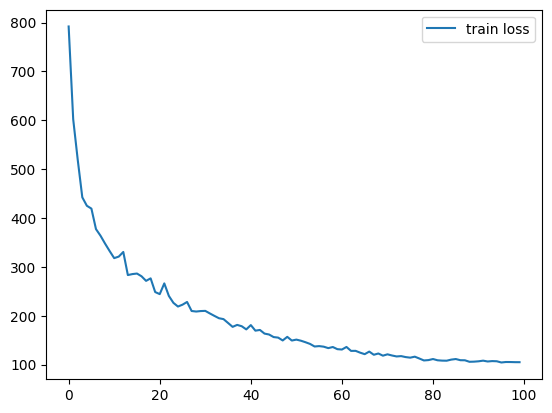

In [60]:
plt.plot(r1.history['loss'], label='train loss')
plt.legend()

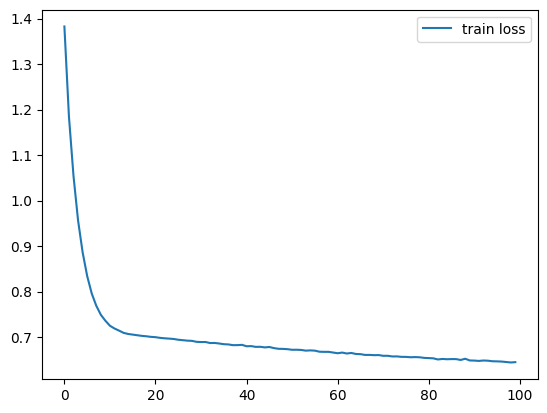

In [61]:
plt.plot(r2.history['loss'], label='train loss')
plt.legend()

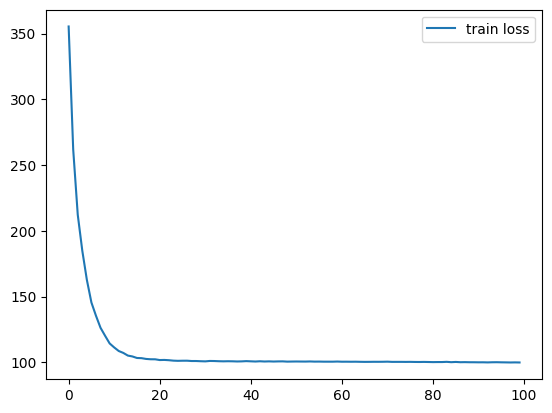

In [62]:
plt.plot(r3.history['loss'], label='train loss')
plt.legend()

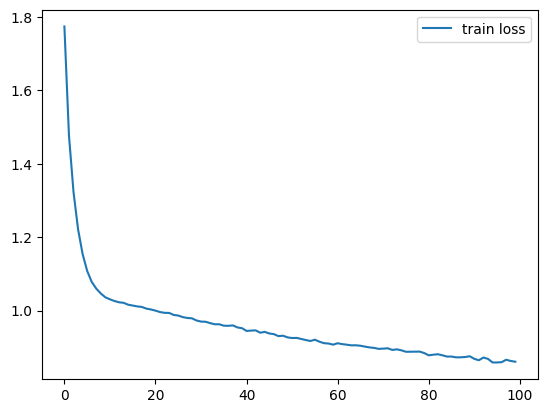

In [63]:
plt.plot(r4.history['loss'], label='train loss')
plt.legend()

In [65]:
Ptrain1 = model1.predict(Xtrain_m1)
Ptest1 = model1.predict(Xtest_m1)
Ptrain2 = model2.predict(Xtrain_m2)
Ptest2 = model2.predict(Xtest_m2)
Ptrain3 = model3.predict(Xtrain_m3)
Ptest3 = model3.predict(Xtest_m3)
Ptrain4 = model4.predict(Xtrain_m4)
Ptest4 = model4.predict(Xtest_m4)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [66]:
Ptrain1 = Ptrain1[:,0]
Ptest1 = Ptest1[0]
Ptrain2 = Ptrain2[:,0]
Ptest2 = Ptest2[0]
Ptrain3 = Ptrain3[:,0]
Ptest3 = Ptest3[0]
Ptrain4 = Ptrain4[:,0]
Ptest4 = Ptest4[0]

In [67]:
Ptest1 = scaler.inverse_transform(Ptest1.reshape(-1, 1)).flatten()
Ptest2 = scaler.inverse_transform(Ptest2.reshape(-1, 1)).flatten()
Ptest3 = scaler.inverse_transform(Ptest3.reshape(-1, 1)).flatten()
Ptest4 = scaler.inverse_transform(Ptest4.reshape(-1, 1)).flatten()

In [68]:
last_train1 = train1.iloc[-1]['LogClose']
last_train2 = train2.iloc[-1]['LogClose']
last_train3 = train3.iloc[-1]['LogClose']
last_train4 = train4.iloc[-1]['LogClose']

In [69]:
print(last_train1, last_train2, last_train3, last_train4)

6.400106266107735 8.031952741139195 7.400636087941132 8.09436361458216


In [71]:
df1.loc[test_idx1, 'multioutput'] = last_train1 + np.cumsum(Ptest1)
df2.loc[test_idx2, 'multioutput'] = last_train2 + np.cumsum(Ptest2)
df3.loc[test_idx3, 'multioutput'] = last_train3 + np.cumsum(Ptest3)
df4.loc[test_idx4, 'multioutput'] = last_train4 + np.cumsum(Ptest4)

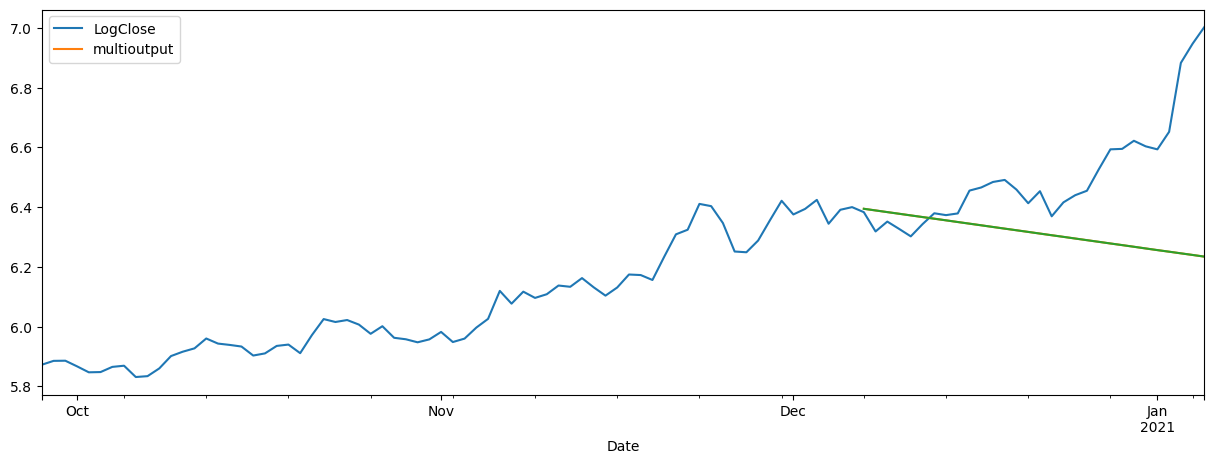

In [73]:
df1.iloc[-100:][['LogClose', 'multioutput']].plot(figsize=(15, 5));
plt.plot(df1.loc[test_idx1, 'multioutput'])

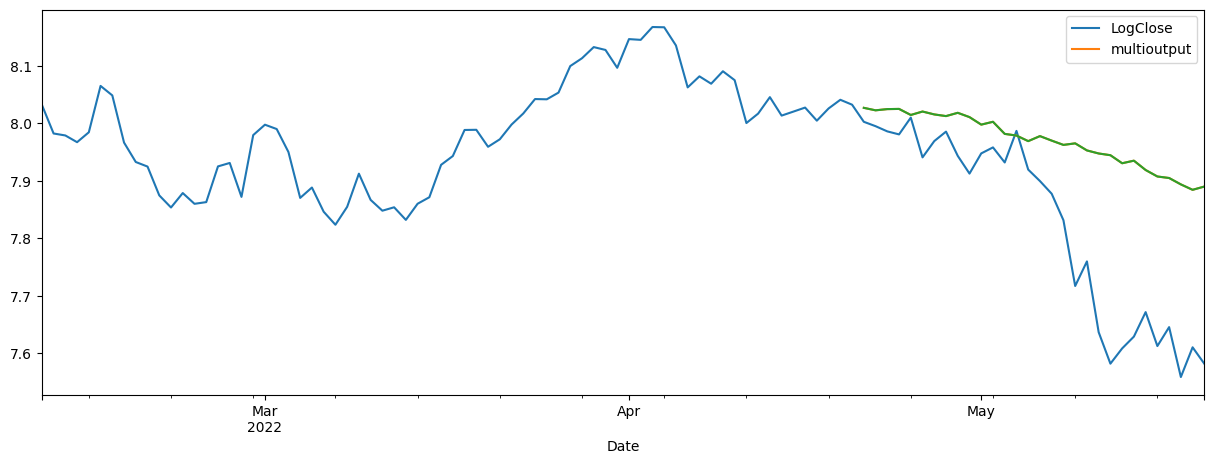

In [74]:
df2.iloc[-100:][['LogClose', 'multioutput']].plot(figsize=(15, 5));
plt.plot(df2.loc[test_idx2, 'multioutput'])

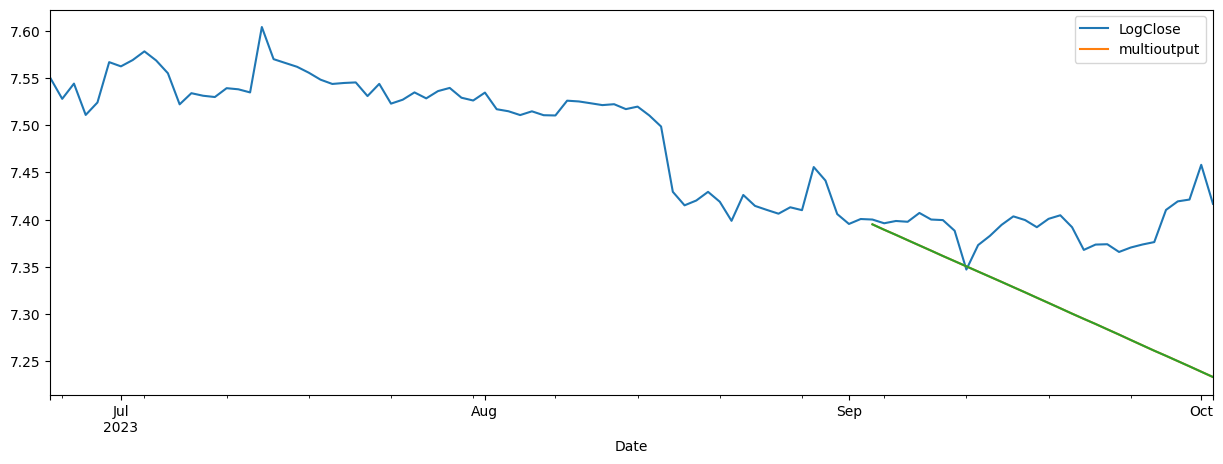

In [75]:
df3.iloc[-100:][['LogClose', 'multioutput']].plot(figsize=(15, 5));
plt.plot(df3.loc[test_idx3, 'multioutput'])

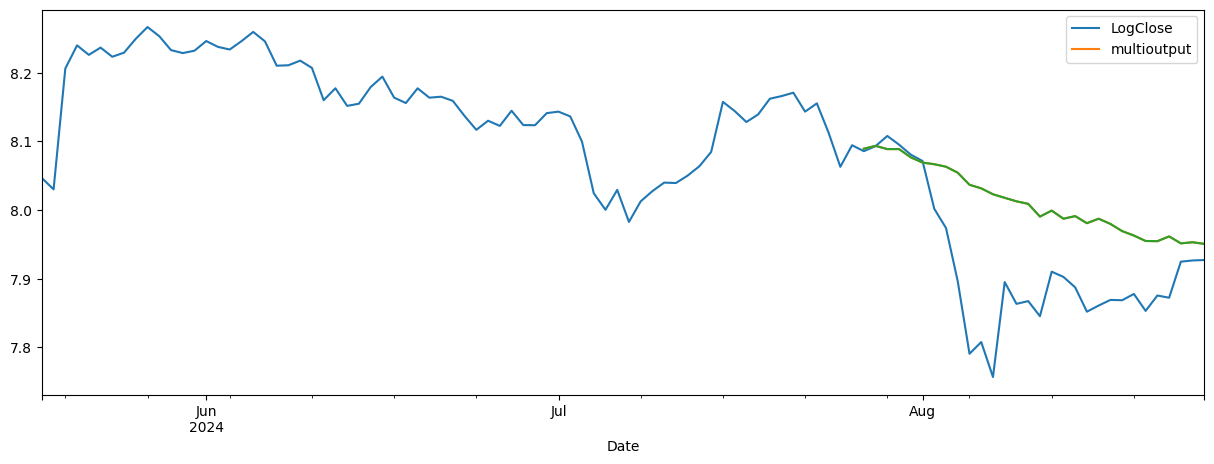

In [76]:
df4.iloc[-100:][['LogClose', 'multioutput']].plot(figsize=(15, 5));
plt.plot(df4.loc[test_idx4, 'multioutput'])

In [77]:
predicted= np.array(np.exp(df4.loc[test_idx4,'multioutput']))
real = np.array(df4.loc[test_idx4,'Close'])
print(predicted,real)

[3259.3032 3272.9492 3257.4512 3257.5908 3218.604  3194.1506 3186.4897
 3174.8447 3147.2432 3092.4158 3076.279  3049.9004 3034.0957 3018.7153
 3007.6233 2952.214  2978.1719 2943.079  2954.38   2923.9421 2943.1199
 2920.836  2890.4382 2871.7832 2849.1086 2848.245  2868.1853 2839.2588
 2843.849  2837.127 ] [3247.60791  3271.4646   3320.539307 3278.667725 3231.295654 3201.564453
 2986.013184 2903.385742 2686.398926 2417.206299 2458.723877 2336.589355
 2683.352783 2599.598633 2610.022949 2553.252197 2724.431885 2703.671875
 2662.914795 2570.087646 2593.186523 2614.546875 2613.357178 2637.306396
 2573.106934 2631.395508 2622.951416 2764.447021 2769.389648 2771.085449]


In [87]:
predicted = np.array(np.exp(df1.loc[test_idx1,'multioutput']))
real = np.array(df1.loc[test_idx1,'Close'])
print(predicted,real)

[598.5858  595.2834  591.9634  588.7293  585.4712  582.25305 579.0472
 575.8745  572.6436  569.4988  566.3668  563.20966 560.0923  557.0544
 553.98035 550.90906 547.8592  544.8845  541.8598  538.87134 535.9263
 532.9429  530.05145 527.12537 524.15173 521.256   518.48035 515.63763
 512.8552  510.01242] [ 591.843384  554.827759  573.479126  559.678528  545.797363  568.567322
  589.663208  586.011169  589.355591  636.181824  642.868958  654.811951
  659.297913  638.290833  609.817871  634.854187  583.7146    611.607178
  626.410706  635.835815  682.642334  730.397339  731.520142  751.618958
  737.803406  730.367554  774.534973  975.50769  1040.233032 1100.006104]


In [94]:
predicted = np.array(np.exp(df2.loc[test_idx2,'multioutput']))
real = np.array(df2.loc[test_idx2,'Close'])
print(predicted,real)

[3060.918  3047.7056 3054.1619 3055.1846 3023.172  3041.3237 3026.0825
 3017.2932 3034.5762 3011.929  2972.868  2987.5723 2925.348  2916.9404
 2888.7407 2914.1055 2891.3162 2869.8462 2877.5923 2842.4434 2827.3655
 2818.8618 2779.7244 2792.2373 2747.193  2716.446  2709.268  2679.3506
 2654.2004 2669.3625] [2987.480713 2964.835693 2938.114014 2922.732666 3009.393555 2808.29834
 2888.929688 2936.940918 2815.601807 2730.186768 2827.756104 2857.4104
 2783.476318 2940.644775 2749.213135 2694.979736 2636.093018 2517.459961
 2245.43042  2343.510986 2072.108643 1961.701538 2014.418213 2056.273926
 2145.706787 2022.725952 2090.40918  1916.656128 2018.336182 1961.315674]


In [101]:
predicted = np.array(np.exp(df3.loc[test_idx3,'multioutput']))
real = np.array(df3.loc[test_idx3,'Close'])
print(predicted,real)

[1627.7853 1618.5247 1609.7395 1600.715  1591.8279 1583.0194 1574.1088
 1565.5177 1556.9252 1548.3497 1539.9    1531.4686 1522.9629 1514.5911
 1506.0454 1497.6559 1489.232  1480.7886 1472.6171 1464.6631 1456.4186
 1448.2946 1440.0044 1431.8412 1423.7456 1416.0516 1408.1613 1400.3403
 1392.4142 1384.5837] [1636.117676 1629.655273 1633.629395 1632.252319 1647.598267 1636.137817
 1635.162354 1616.828857 1551.637695 1592.429443 1607.988525 1626.974365
 1641.640381 1635.22168  1622.896729 1637.347046 1643.544678 1622.890625
 1584.307007 1593.268311 1593.857788 1580.853394 1588.322876 1593.417236
 1597.491211 1652.88269  1667.943848 1671.161865 1733.810425 1663.627563]


In [79]:
predicted_10d = predicted
real_10d = real

In [102]:
predicted_50d = predicted
real_50d = real

In [95]:
predicted_100d = predicted
real_100d = real

In [106]:
pred = []
real = []
pred.append(predicted_10d)
pred.append(predicted_50d)
pred.append(predicted_100d)
real.append(real_10d)
real.append(real_50d)
real.append(real_100d)

In [107]:
r2_score(pred,real)

0.7476319428446964

In [103]:
print("R2 score for 10, 50 and 100 days are:",round(r2_score(real_10d, predicted_10d),4), round(r2_score(real_50d, predicted_50d),4),round(r2_score(real_100d, predicted_100d),4))

R2 score for 10, 50 and 100 days are: -0.4002 -17.9191 -0.366


In [104]:
print("MAPE score for 10, 50 and 100 days are:",round(mean_absolute_percentage_error(real_10d, predicted_10d)*100,2),round(mean_absolute_percentage_error(real_50d, predicted_50d)*100,2),round(mean_absolute_percentage_error(real_100d, predicted_100d)*100,2))

MAPE score for 10, 50 and 100 days are: 10.14 7.5 16.77


In [105]:
print("MAE scores for 10, 50 and 100 days are:",round(mean_absolute_error(real_10d, predicted_10d),2),round(mean_absolute_error(real_50d, predicted_50d),2),round(mean_absolute_error(real_100d, predicted_100d),2))

MAE scores for 10, 50 and 100 days are: 262.75 122.77 368.08


In [99]:
print("MSE scores for 10, 50 and 100 days are:",round(mean_squared_error(real_10d, predicted_10d),2),round(mean_squared_error(real_50d, predicted_50d),2),round(mean_squared_error(real_100d, predicted_100d),2))

MSE scores for 10, 50 and 100 days are: 105726.52 40561.6 212008.54


In [100]:
print("RMSE scores for 10, 50 and 100 days are:",round(root_mean_squared_error(real_10d, predicted_10d),2),round(root_mean_squared_error(real_50d, predicted_50d),2),round(root_mean_squared_error(real_100d, predicted_100d),2))

RMSE scores for 10, 50 and 100 days are: 325.16 201.4 460.44
